# Dumps Analysis

This Jupyter Notebook serves as an analysis step for all the runs we did on mnist addition & Co.

In [8]:
import os
import json
import pandas as pd

folder_path = '../dumps/'

file_filter = lambda x: x.startswith('dset_halfmnist-model_mnistdpl-tag_dis-seed_0-nens_5-ood_True-lambda_0.8.json') #x.startswith('dset_addmnist-model_mnistdpl-tag_joint-seed_') and x.endswith('-nens_5-lambda_10.0.json')

selected_files = [file for file in os.listdir(folder_path) if file_filter(file)]

data_list = []

for file in selected_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as json_file:
        json_data = json.load(json_file)
        data_list.append(json_data)

# If the JSON data is a list of dictionaries, you can directly convert it to a DataFrame
result_df = pd.DataFrame(data_list)

for col in result_df.columns:
    print(col)

result_df.head()

mean_hc
yac
cac
yac_hard
cac_hard
cf1
yf1
ece
ece y
frequentist ece single concept
e_c1
e_c2
e_c
e_(c1, c2)
var_c1
var_c2
var_c
var_(c1, c2)
c_acc_count
c_acc
w_acc_count
w_acc
c_ova_filtered
c_all_filtered
mcdropout ece single concept
resense ece single concept
ensemble ece single concept


In [ ]:
selected_files = [
    '../dumps/dset_halfmnist-model_mnistdpl-tag_dis-seed_0-nens_5-ood_False-lambda_1.0_incomplete_frequentist_real-kl_True.json', 
    '../dumps/dset_halfmnist-model_mnistdpl-tag_dis-seed_0-nens_5-ood_False-lambda_1.0_incomplete_mcdropout_real-kl_True.json', 
    '../dumps/dset_halfmnist-model_mnistdpl-tag_dis-seed_0-nens_5-ood_False-lambda_0.8_incomplete_laplace_real-kl_True.json', 
    '../dumps/dset_halfmnist-model_mnistdpl-tag_dis-seed_0-nens_5-ood_False-lambda_1.0_incomplete_ensemble_real-kl_True.json', 
    '../dumps/dset_halfmnist-model_mnistdpl-tag_dis-seed_0-nens_5-ood_False-lambda_0.8_incomplete_bears_real-kl_True.json', 
]

for file in selected_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as json_file:
        json_data = json.load(json_file)
        data_list.append(json_data)

FileNotFoundError: [Errno 2] No such file or directory: '../dumps/../dumps/dset_halfmnist-model_mnistdpl-tag_dis-seed_0-nens_5-ood_False-lambda_1.0_incomplete_laplace_real-kl_True.json'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    
    lower_bound, upper_bound = stats.norm.interval(confidence, loc=mean, scale=sem)
    return mean, lower_bound, upper_bound

def scatter_plot_with_confidence_interval(x, y, labels, confidence=0.95, title='', xlabel='', ylabel='', ylim = None, xlim = None, colors = None, markers = None):
    if colors is None:
        colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

    if markers is None:
        markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p']
    
    mean_x = np.mean(x, axis=1)
    mean_y = np.mean(y, axis=1)
    
    conf_int_x = [compute_confidence_interval(values, confidence) for values in x]
    lower_bound_x = [ci[1] for ci in conf_int_x]
    upper_bound_x = [ci[2] for ci in conf_int_x]

    conf_int_y = [compute_confidence_interval(values, confidence) for values in y]
    lower_bound_y = [ci[1] for ci in conf_int_y]
    upper_bound_y = [ci[2] for ci in conf_int_y]
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    for i, (x_values, y_values) in enumerate(zip(mean_x, mean_y)):
        plt.scatter(x_values, y_values, color=colors[i % len(colors)], marker=markers[i % len(markers)], label=labels[i])

    plt.errorbar(mean_x, mean_y, xerr=[mean_x - lower_bound_x, upper_bound_x - mean_x], fmt='none', color='black', capsize=5, label='95% CI along x-axis')
    plt.errorbar(mean_x, mean_y, yerr=[mean_y - lower_bound_y, upper_bound_y - mean_y], fmt='none', color='red', capsize=5, label='95% CI along y-axis')
    
    if ylim:
        plt.ylim(0, ylim)

    if xlim:
        plt.ylim(0, xlim)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def bar_plot_with_confidence_interval(data, confidence=0.95, title='', xlabel='', ylabel='', labels='', ylim=None):
    means = np.mean(data, axis=1)
    confidence_intervals = [compute_confidence_interval(values, confidence) for values in data]

    lower_bounds = [ci[1] for ci in confidence_intervals]
    upper_bounds = [ci[2] for ci in confidence_intervals]

    yerr = [means - lower_bounds, upper_bounds - means]

    sns.set(style="whitegrid")
    
    plt.bar(labels, means, yerr=yerr, capsize=5, color='skyblue', edgecolor='black')

    if ylim:
        plt.ylim(0, ylim)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

def grouped_bar_plot_with_confidence_interval(categories, data, confidence=0.95, title='', xlabel='', ylabel='', labels='', ylim=None, ax = None, show = None, do_yerr=True):
    num_modalities = len(data)
    num_experiments = len(data[0])

    means = np.mean(data, axis=2)

    if do_yerr:
        confidence_intervals = []
        lower_bounds = []
        upper_bounds = []
        for i in range(data.shape[0]):
            current_ci = [compute_confidence_interval(values, confidence) for values in data[i]]
            confidence_intervals.append(current_ci)
            lb = np.array([ci[1] for ci in current_ci])
            ub = np.array([ci[2] for ci in current_ci])

            upper_bounds.append(ub)
            lower_bounds.append(lb)

        lower_bounds = np.asarray(lower_bounds)
        upper_bounds = np.asarray(upper_bounds)

    bar_width = 0.2

    sns.set(style="whitegrid")

    if not ax:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

    for i in range(num_modalities):
        if do_yerr:
            yerr = np.array([means[i] - lower_bounds[i], upper_bounds[i] - means[i]])
        else:
            yerr = None

        x_positions = np.arange(num_experiments) + i * bar_width
        ax.bar(x_positions, means[i], yerr=yerr,
               capsize=5, width=bar_width, label=categories[i])

    if ylim:
        ax.set_ylim(0, ylim)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(num_experiments) + (num_modalities - 1) * bar_width / 2)  # Adjust x-axis labels
    ax.set_xticklabels(labels)
    ax.legend()

    if show:
        plt.show()
        plt.close()

def two_grouped_bar_plot_with_confidence_interval(categories, data_1, data_2, confidence=0.95, title_1='', title_2='', xlabel='', ylabel_1='', ylabel_2='', labels='', ylim=None, do_yerr_1=True, do_yerr_2=True):
    sns.set(style="whitegrid")

    # Create a subplot with 2 rows and 1 column
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16), sharex=True)

    # Plot the first grouped bar plot in the first subplot
    grouped_bar_plot_with_confidence_interval(ax=axes[0], categories=categories, data=data_1, confidence=confidence, title=title_1, xlabel=xlabel, ylabel=ylabel_1, labels=labels, do_yerr=do_yerr_1)

    # Plot the second grouped bar plot in the second subplot
    grouped_bar_plot_with_confidence_interval(ax=axes[1], categories=categories, data=data_2, confidence=confidence, title=title_2, xlabel=xlabel, ylabel=ylabel_2, labels=labels, ylim=ylim, do_yerr=do_yerr_2)

    plt.show()
    plt.close()

In [4]:
from enum import Enum

def revert_column_with_rows(experiments):
    return [
        [experiment[i] for experiment in experiments] for i in range(len(experiments[0]))
    ]

class EVALUATION_TYPE(Enum):
    NORMAL = 'frequentist'
    LAPLACE = 'laplace'
    MC_DROPOUT = 'mcdropout'
    ENSEMBLE = 'ensemble'

# for your analysis

selected_concept = 8
n_concepts = 10
concept_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

/mnt/cimec-storage6/users/samuele.bortolotti/RSs/reasoning-shortcut/venv/reasoning-shortcut/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/cimec-storage6/users/samuele.bortolotti/RSs/reasoning-shortcut/venv/reasoning-shortcut/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/cimec-storage6/users/samuele.bortolotti/RSs/reasoning-shortcut/venv/reasoning-shortcut/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/mnt/cimec-storage6/users/samuele.bortolotti/RSs/reasoning-shortcut/venv/reasoning-shortcut/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, No

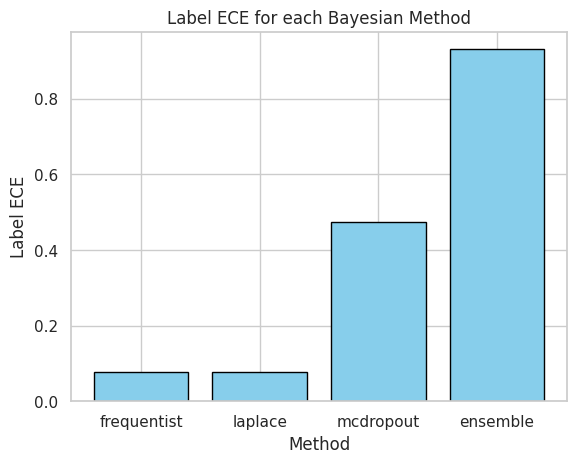

In [11]:
bar_plot_with_confidence_interval(
    data = np.asarray(revert_column_with_rows(result_df['ece y'].tolist()), dtype=float),
    confidence=0.95, 
    title='Label ECE for each Bayesian Method',
    xlabel='Method',
    ylabel='Label ECE',
    labels = [member.value for member in EVALUATION_TYPE],
)

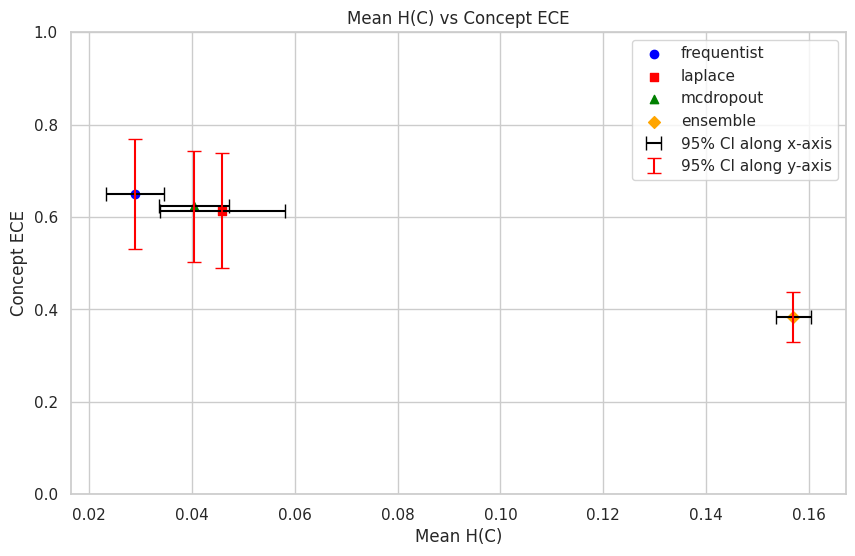

In [48]:
scatter_plot_with_confidence_interval(
    x = np.asarray(revert_column_with_rows(result_df['mean_hc'].tolist()), dtype=float),
    y = np.asarray(revert_column_with_rows(result_df['ece'].tolist()), dtype=float),
    labels = [member.value for member in EVALUATION_TYPE],
    title='Mean H(C) vs Concept ECE',
    xlabel='Mean H(C)',
    ylabel='Concept ECE',
    ylim = 1
)

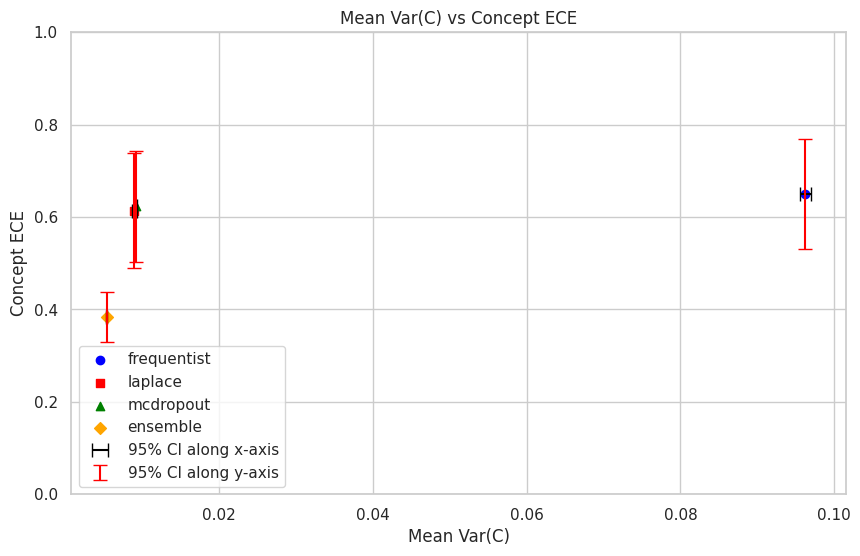

In [49]:
scatter_plot_with_confidence_interval(
    x = np.asarray(revert_column_with_rows(result_df['mean_var_c'].tolist()), dtype=float),
    y = np.asarray(revert_column_with_rows(result_df['ece'].tolist()), dtype=float),
    labels = [member.value for member in EVALUATION_TYPE],
    title='Mean Var(C) vs Concept ECE',
    xlabel='Mean Var(C)',
    ylabel='Concept ECE',
    ylim = 1
)

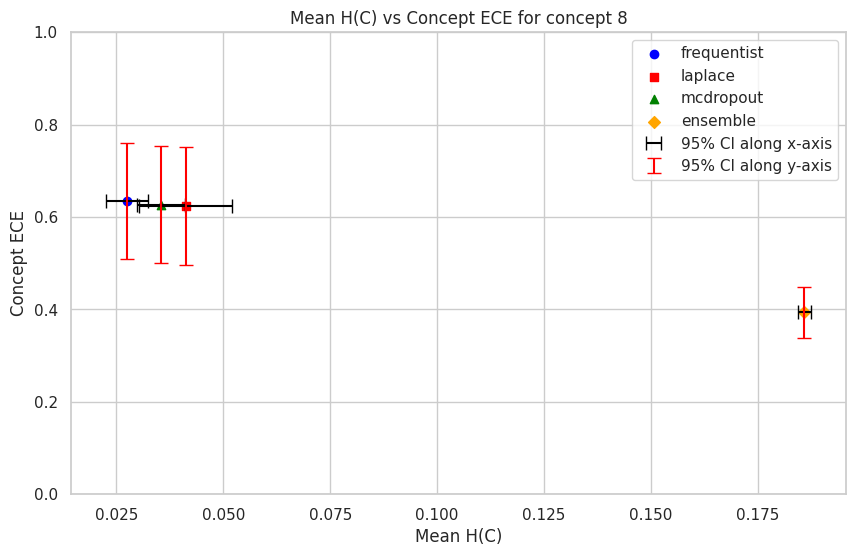

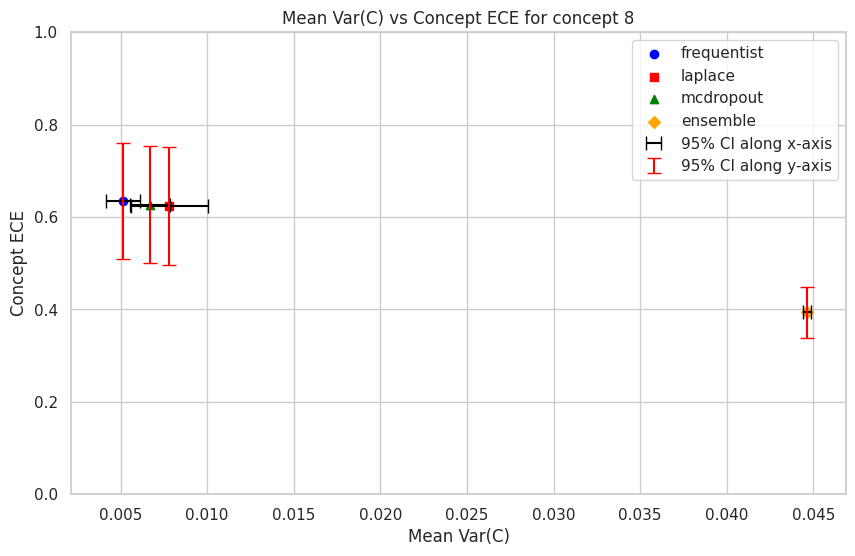

In [50]:
e_c_experiments = revert_column_with_rows(result_df['e_c'].tolist())
var_c_experiments = revert_column_with_rows(result_df['var_c'].tolist())

for c in range(n_concepts):

    if c != selected_concept:
        continue
    
    current_hc = []
    current_var_c = []
    current_ece = []
    
    for e, member in enumerate(EVALUATION_TYPE):
        for_current_e_ec = revert_column_with_rows(e_c_experiments[e])
        for_current_e_varc = revert_column_with_rows(var_c_experiments[e])
        ece_single_concept_exp = revert_column_with_rows(result_df[f"{member.value} ece single concept"].tolist())
        
        current_hc.append(for_current_e_ec[c])
        current_var_c.append(for_current_e_varc[c])
        current_ece.append(ece_single_concept_exp[c])

    current_hc = np.asarray(current_hc, dtype=float)
    current_var_c = np.asarray(current_var_c, dtype=float)
    current_ece = np.asarray(current_ece, dtype=float)

    scatter_plot_with_confidence_interval(
        x = current_hc,
        y = current_ece,
        labels = [member.value for member in EVALUATION_TYPE],
        title=f"Mean H(C) vs Concept ECE for concept {c}",
        xlabel='Mean H(C)',
        ylabel='Concept ECE',
        ylim = 1
    )

    scatter_plot_with_confidence_interval(
        x = current_var_c,
        y = current_ece,
        labels = [member.value for member in EVALUATION_TYPE],
        title=f"Mean Var(C) vs Concept ECE for concept {c}",
        xlabel='Mean Var(C)',
        ylabel='Concept ECE',
        ylim = 1
    )

Means shape (4, 10)
Data shape before (4, 10, 30)
Lmao - 1 (4, 10)
Lmao - 2 (4, 10)


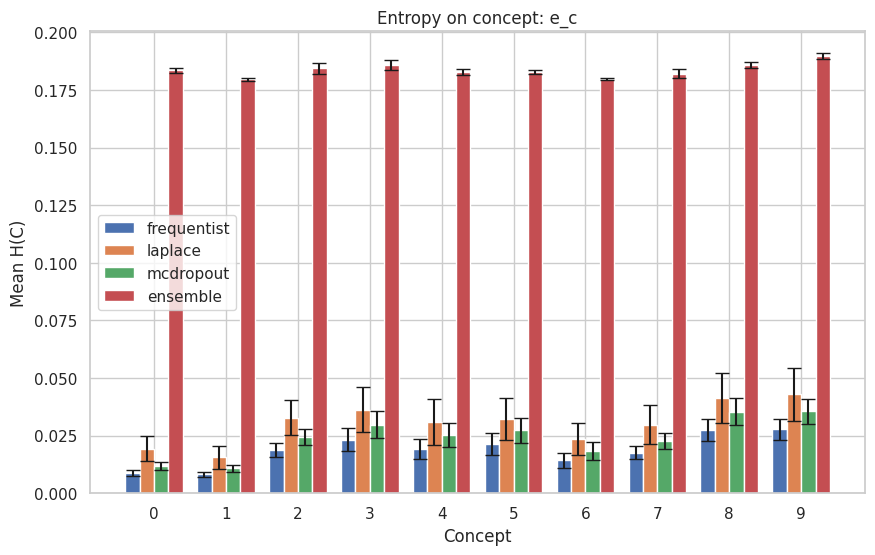

In [72]:
from itertools import product

for c_prob in ['e_c1', 'e_c2', 'e_c', 'e_(c1, c2)']:

    if c_prob not in ['e_c']:
        continue
    
    categories = concept_labels

    if c_prob == 'e_(c1, c2)':
        categories = ["".join(comb) for comb in product(concept_labels, repeat=2)]

    c_prob_list = np.asarray(revert_column_with_rows(result_df[c_prob].tolist()), dtype=float)
    c_prob_list = np.transpose(c_prob_list, axes=(0, 2, 1))

    grouped_bar_plot_with_confidence_interval(
        categories = [member.value for member in EVALUATION_TYPE],
        confidence = 0.95,
        data = c_prob_list,
        title = "Entropy on concept: e_c",
        ylabel = "Mean H(C)",
        xlabel = "Concept",
        labels = [i for i in range(n_concepts)],
        show=True
    )

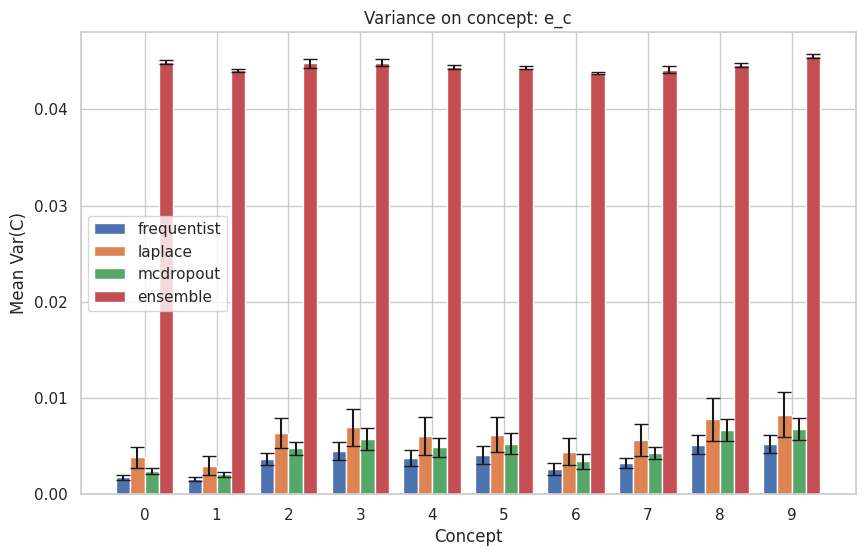

In [81]:
from itertools import product

for c_prob in ['var_c1', 'var_c2', 'var_c', 'var_(c1, c2)']:

    if c_prob not in ['var_c']:
        continue
    
    categories = concept_labels

    if c_prob == 'var_(c1, c2)':
        categories = ["".join(comb) for comb in product(concept_labels, repeat=2)]

    c_prob_list = np.asarray(revert_column_with_rows(result_df[c_prob].tolist()), dtype=float)
    c_prob_list = np.transpose(c_prob_list, axes=(0, 2, 1))

    grouped_bar_plot_with_confidence_interval(
        categories = [member.value for member in EVALUATION_TYPE],
        confidence = 0.95,
        data = c_prob_list,
        title = "Variance on concept: e_c",
        ylabel = "Mean Var(C)",
        xlabel = "Concept",
        labels = [i for i in range(n_concepts)],
        show=True,
    )

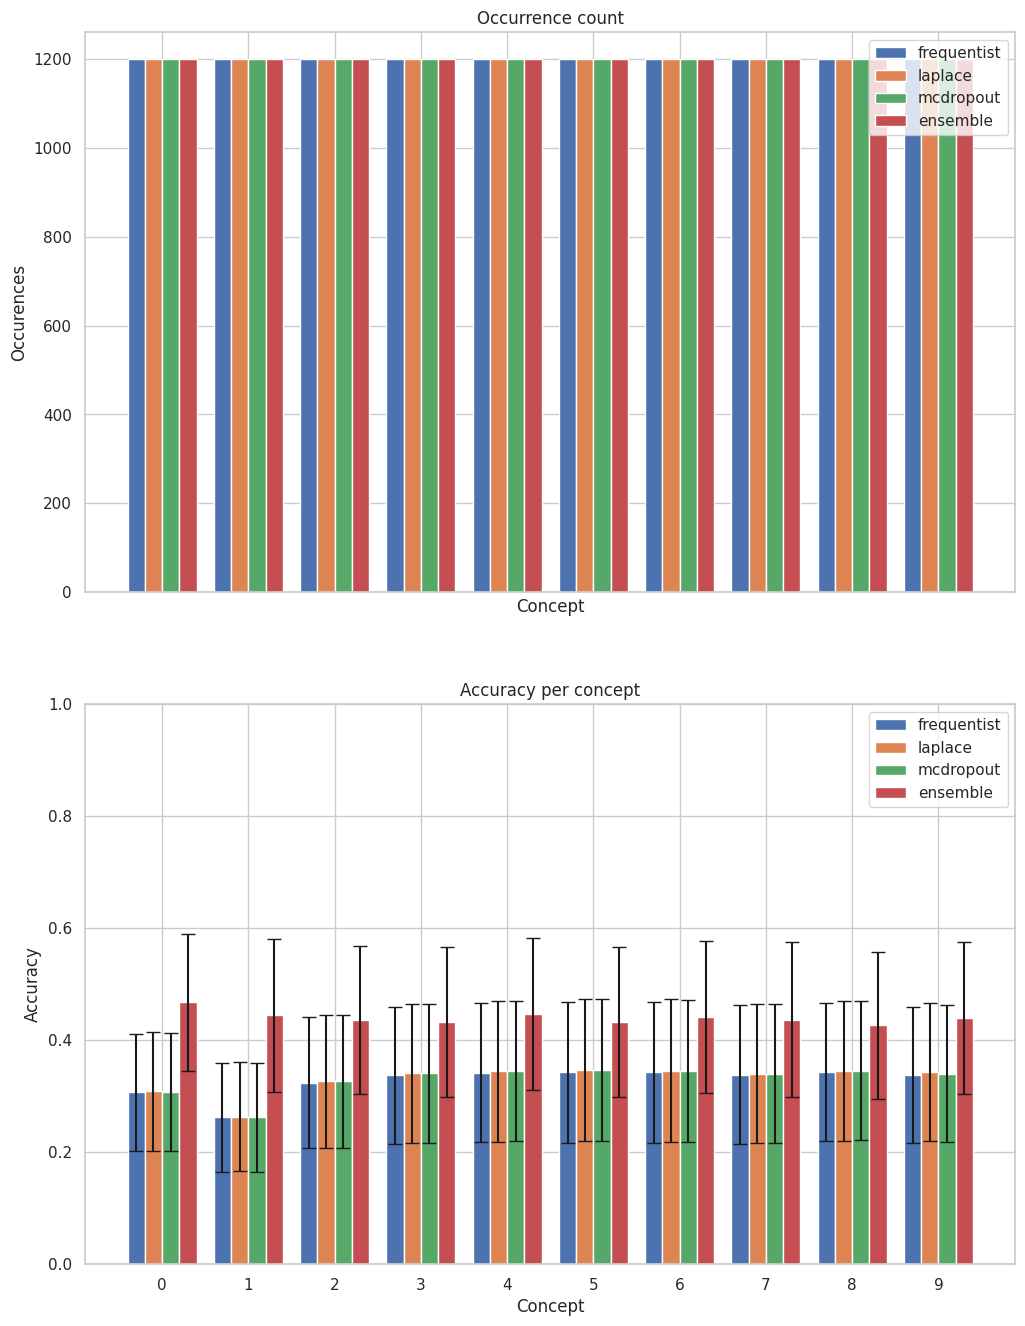

In [82]:
for acc, count in zip(['c_acc', 'w_acc'], ['c_acc_count','w_acc_count']):
    
    if acc != 'c_acc' and count != 'c_acc_count':
        continue

    categories = concept_labels
    
    if acc == 'w_acc':
        categories = ["".join(comb) for comb in product(concept_labels, repeat=2)]

    count_list = revert_column_with_rows(result_df[count].tolist())
    count_list = np.transpose(count_list, axes=(0, 2, 1))
    acc_list = revert_column_with_rows(result_df[acc].tolist())
    acc_list = np.transpose(acc_list, axes=(0, 2, 1))

    two_grouped_bar_plot_with_confidence_interval(
        categories = [member.value for member in EVALUATION_TYPE],
        data_1=count_list,
        data_2=acc_list,
        confidence=0.95,
        title_1='Occurrence count',
        title_2='Accuracy per concept', 
        xlabel='Concept',
        ylabel_1='Occurences',
        ylabel_2='Accuracy',
        labels=[i for i in range(n_concepts)],
        ylim=1,
        do_yerr_1=False,
    )

## Generation of the table

This part serves as a table generation process:

- once the dataset is specified, for each of the methods compute
- ECE on concept, ECE on labels (only if ood, we suppose it is already like that), H(C) and Var(C)
- Put it in a tabular like value

In [129]:
def get_table_data_item(dataset, model, tag, lambda_v, categories):

    def half_width(upper_bound, lower_bound):
        return (upper_bound - lower_bound) / 2

    def get_single_item(df, categories, value_name):
        values = np.asarray(revert_column_with_rows(result_df[value_name].tolist()), dtype=float)
        ci = [compute_confidence_interval(method, 0.95) for method in values]
        means = [c[0] for c in ci]
        lower_bounds = [c[1] for c in ci]
        upper_bounds = [c[2] for c in ci]
        strings = [f"{means[i]} +- {half_width(upper_bounds[i], lower_bounds[i])}" for i in range(len(values))]
        rtn_dict = {}
        for i, c in enumerate(categories):
            rtn_dict[c] = strings[i]
        return rtn_dict
    
    folder_path = 'XOR_MNIST/dumps_2/'
    file_filter = lambda x: x.startswith(f"dset_{dataset}-model_{model}-tag_{tag}-seed_") and x.endswith(f"-nens_5-lambda_{lambda_v}.json")
    selected_files = [file for file in os.listdir(folder_path) if file_filter(file)]

    assert len(selected_files) == 30

    data_list = []

    for file in selected_files:
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as json_file:
            json_data = json.load(json_file)
            data_list.append(json_data)
    
    result_df = pd.DataFrame(data_list)

    concept_ece = get_single_item(result_df, categories, 'ece')
    label_ece = get_single_item(result_df, categories, 'ece concept')
    mean_hc = get_single_item(result_df, categories, 'mean_hc')
    mean_var_c = get_single_item(result_df, categories, 'mean_var_c')

    return {"concept ece": concept_ece, "label ece": label_ece, "mean H(C)": mean_hc, "mean Var(C)": mean_var_c }

In [131]:
model = 'mnistdpl'
dataset = 'addmnist'
joint = 'joint'
lambda_v = '10.0'
categories =  ['frequentist', 'mcdropout', 'laplace', 'ensembles']

df = pd.DataFrame(get_table_data_item(dataset, model, joint, lambda_v, categories))
print(model, dataset, joint, lambda_v)
df

mnistdpl addmnist joint 10.0


,concept ece,label ece,mean H(C),mean Var(C)
frequentist,0.6494226223262647 +- 0.11940655666799227,0.017173290152019915 +- 0.0009355259644706071,0.02893997114151716 +- 0.0056035049620043464,0.09624905611077944 +- 0.0007137848895902021
mcdropout,0.6137932178181079 +- 0.12484755418111906,0.019608281118588318 +- 0.010108092220262647,0.04589289408177137 +- 0.012152757860393909,0.008961345705514153 +- 0.00028259342727367937
laplace,0.6232044865881817 +- 0.12023034231929974,0.012339147242738142 +- 0.003505133964535465,0.04037716370075941 +- 0.006820757303287246,0.009108708364268144 +- 0.0001473293051915906
ensembles,0.38360657631754874 +- 0.05454925591985332,0.010108799222277264 +- 0.003081335786314565,0.1569926569859187 +- 0.0033756364015470885,0.0053251738349596655 +- 4.1141601358051644e-05
